This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

## Data representations for neural networks

### Scalars (rank-0 tensors)

A tensor that contains only one number is called a scalar (or scalar tensor, or rank-0 tensor, or 0D tensor). In NumPy, a `float32` or `float64` number is a scalar tensor (or scalar array). You can display the number of axes of a NumPy tensor via the `ndim` attribute; a scalar tensor has 0 axes (`ndim == 0`). The number of axes of a tensor is also called its rank.

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim, x.shape

(0, ())

### Vectors (rank-1 tensors)

An array of numbers is called a vector, or rank-1 tensor, or 1D tensor. A rank-1 tensor is said to have exactly one axis. Following is a NumPy vector

In [3]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [4]:
x.ndim, x.shape

(1, (5,))

### Matrices (rank-2 tensors)

An array of vectors is a , or rank-2 tensor, or 2D tensor. A matrix matrix has two axes (often referred to rows and columns). You can visually interpret a matrix as a rectangular grid of numbers. This is a NumPy matrix:

In [5]:
x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
])

x.ndim, x.shape

(2, (3, 5))

In [6]:
# access rows
x[1]

array([ 6, 79,  3, 35,  1])

In [7]:
# access columns
x[:,1]

array([78, 79, 80])

### Rank-3 tensors and higher-rank tensors

If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor), which you can visually interpret as a cube of numbers. Following is a NumPy rank-3 tensor:

In [8]:
x = np.array([
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ]
])

x.ndim, x.shape

(3, (3, 3, 5))

By packing rank-3 tensors in an array, you can create a rank-4 tensor, and so on. In deep learning, you’ll generally manipulate tensors with ranks 0 to 4, although you may go up to 5 if you process video data.

### Key attributes

A tensor is defined by three key attributes:

- Number of axes (**rank**)—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s `ndim` in Python libraries such as NumPy or TensorFlow.
- **Shape**—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape $(3, 5)$, and the rank-3 tensor example has shape $(3, 3, 5)$. A vector has a shape with a single element, such as $(5,)$, whereas a scalar has an empty shape, $()$.
- **Data type** (usually called `dtype` in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be `float16`, `float32`, `float64`, `uint8`, and so on. In TensorFlow, you are also likely to come across `string` tensors.

In [9]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
train_images.ndim

3

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_images.dtype

dtype('uint8')

So what we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of $60,000$ matrices of $28 \times 28$ integers. Each such matrix is a grayscale image, with coefficients between $0$ and $255$.

**Displaying the fourth digit**

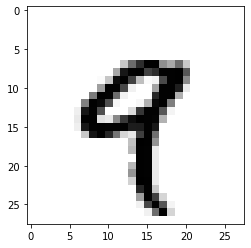

In [13]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [14]:
train_labels[4]

9

### Manipulating tensors in NumPy

In the previous example, we selected a specific digit alongside the first axis using the syntax `train_images[i]`. Selecting specific elements in a tensor is called tensor **slicing**. Let’s look at the tensor-slicing operations you can do on NumPy arrays

In [15]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [16]:
# this is identical but more verbose and explicit, telling that you want all data from the second and third axes (short :)
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [17]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [18]:
# For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you would do this
my_slice = train_images[:, 14:, 14:]

It’s also possible to use negative indices. Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. In order to crop the images to patches of $14 \times 14$ pixels centered in the middle, you do this

In [19]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the **samples axis** (sometimes called the samples dimension). In the MNIST example, "samples" are images of digits.

In [20]:
batch = train_images[:128]  # first batch

In [21]:
batch = train_images[128:256]  # second batch

In [22]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]  # nth batch

When considering such a batch tensor, the first axis (axis 0) is called the **batch axis** or batch dimension. This is a term you’ll frequently encounter when using Keras and other deep-learning libraries.

### Real-world examples of data tensors

Let’s make data tensors more concrete with a few examples similar to what you’ll encounter later. The data you’ll manipulate will almost always fall into one of the following categories:

- **Vector data**—rank-$2$ tensors of shape `(samples, features)`, where each sample is a vector of numerical attributes ("features").
- **Timeseries data or sequence data** — rank-$3$ tensors of shape `(samples, timesteps, features)`, where each sample is a sequence (of length `timesteps`) of feature vectors.
- **Images**—rank-$4$ tensors of shape `(samples, height, width, channels)`, where each sample is a 2D grid of pixels, and each pixel is represented by a vector of values ("channels").
- **Video**—rank-$5$ tensors of shape `(samples, frames, height, width, channels)`, where each sample is a sequence (of length frames) of images.

### Vector data

![](https://am3pap005files.storage.live.com/y4mDDtHHiJKppMkqD9ryFP0adqiSksMluXfKctc64Fi9in08eFk6G6Zw9jI2TNdHOQ4YmnX6KjEt2BNujXC9dSNk3UeQXpPm_S3B371D2290nFZSbgAdBHCZ-3O4uAqxg64DaKY0sselTbuZqK0GwaJnpK3WHM9kQbpp4AM1Z-uOo1DfVkAnNr_JC-TxzVNEFiw?width=262&height=282&cropmode=none)

Let’s take a look at two examples:

- An actuarial dataset of people, where we consider each person’s `age`, `gender`, and `income`. Each person can be characterized as a vector of $3$ values, and thus an entire dataset of $100,000$ people can be stored in a rank-$2$ tensor of shape $(100000, 3)$. 
- A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of $20,000$ common words). Each document can be encoded as a vector of $20,000$ values (one count per word in the dictionary), and thus an entire dataset of $500$ documents can be stored in a tensor of shape $(500, 20000)$.

In [23]:
import pandas as pd
import numpy as np

N = 100_000
people = pd.DataFrame({"age": np.random.randint(0, 100, N), "gender": np.random.randint(0, 2, N), "income": np.random.uniform(1000, 1_000_000, N)})

In [24]:
people.head()

,age,gender,income
0,85,1,466077.047018
1,34,1,497860.288253
2,8,1,894788.996139
3,48,1,418515.683408
4,79,0,81047.675798


In [25]:
people.values[0]

array([8.50000000e+01, 1.00000000e+00, 4.66077047e+05])

In [26]:
people.values

array([[8.50000000e+01, 1.00000000e+00, 4.66077047e+05],
       [3.40000000e+01, 1.00000000e+00, 4.97860288e+05],
       [8.00000000e+00, 1.00000000e+00, 8.94788996e+05],
       ...,
       [4.70000000e+01, 1.00000000e+00, 1.56363689e+04],
       [9.50000000e+01, 0.00000000e+00, 6.00983319e+05],
       [2.60000000e+01, 1.00000000e+00, 7.57979070e+05]])

### Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a rank-$3$ tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a rank-$2$ tensor), and thus a batch of data will be encoded as a rank-$3$ tensor.

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-timeseries_data.png)

The time axis is always the second axis (axis of index 1), by convention. Let’s look at a few examples:

- A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a $3$D vector, an entire day of trading is encoded as a matrix of shape $(390, 3)$ (there are $390$ minutes in a trading day), and $250$ days' worth of data can be stored in a rank-$3$ tensor of shape $(250, 390, 3)$. Here, each sample would be one day’s worth of data
- A dataset of tweets, where we encode each tweet as a sequence of $280$ characters out of an alphabet of $128$ unique characters. In this setting, each character can be encoded as a binary vector of size $128$ (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a rank-$2$ tensor of shape $(280, 128)$, and a dataset of $1$ million tweets can be stored in a tensor of shape $(1000000, 280, 128)$.

### Image data

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in rank-$2$ tensors, by convention image tensors are always rank-$3$, with a one-dimensional color channel for grayscale images. A batch of $128$ grayscale images of size $256 \times 256$ could thus be stored in a tensor of shape $(128, 256, 256, 1)$, and a batch of $128$ color images could be stored in a tensor of shape $(128, 256, 256, 3)$

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ch02-image_data.png)

There are two conventions for shapes of images tensors: the **channels-last** convention (which is standard in TensorFlow) and the **channels-first** convention (which is increasingly falling out of favor).

The channels-last convention places the color-depth axis at the end: `(samples, height, width, color_depth)`. Meanwhile, the channels-first convention places the color depth axis right after the batch axis: `(samples, color_depth, height, width)`. With the channels-first convention, the previous examples would become $(128, 1, 256, 256)$ and $(128, 3, 256, 256)$. The Keras API provides support for both formats.

### Video data

Video data is one of the few types of real-world data for which you’ll need rank-$5$ tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a rank-$3$ tensor `(height, width, color_depth)`, a sequence of frames can be stored in a rank-$4$ tensor `(frames, height, width, color_depth)`, and thus a batch of different videos can be stored in a rank-$5$ tensor of shape `(samples, frames, height, width, color_depth)`.

For instance, a $60$-second, $144 \times 256$ YouTube video clip sampled at $4$ frames per second would have $240$ frames. A batch of $4$ such video clips would be stored in a tensor of shape $(4, 240, 144, 256, 3)$. That’s a total of $106,168,320$ values! If the dtype of the tensor was `float32`, then each value would be stored in $32$ bits, so the tensor would represent $405$ MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in `float32`, and
they’re typically compressed by a large factor (such as in the MPEG format).